In [24]:
import matplotlib.pyplot as plt
import os
from collections import Counter
from datasets import load_from_disk


# Path to the clients_dataset folder
clients_dataset_path = "../src/clients_dataset"


# Function to load data and count label distribution
def load_and_count_labels(client_folder):
    distribution = {}
    for data_folder in os.listdir(client_folder):
        label_counts = Counter()
        data = load_from_disk(os.path.join(client_folder, data_folder))
        print(f"Processing {data_folder}", f"size_of_dataset {len(data)}")
        for sample in data:
            label = sample["label"]
            label_counts[label] += 1
        distribution[data_folder] = label_counts
    return distribution


# Iterate over each client folder and collect label distributions
client_label_distributions = {}
for client_folder in os.listdir(clients_dataset_path):
    print(f"Processing {client_folder}")
    client_path = os.path.join(clients_dataset_path, client_folder)
    if os.path.isdir(client_path):
        client_label_distributions[client_folder] = load_and_count_labels(client_path)
        print(sep="\n")

Processing client_0
Processing clean_train_data size_of_dataset 10776
Processing poisoned_data size_of_dataset 4348
Processing train_data size_of_dataset 10776
Processing val_data size_of_dataset 2694

Processing client_1
Processing train_data size_of_dataset 11364
Processing val_data size_of_dataset 2841

Processing client_2
Processing train_data size_of_dataset 7442
Processing val_data size_of_dataset 1861

Processing client_3
Processing train_data size_of_dataset 8884
Processing val_data size_of_dataset 2222

Processing client_4
Processing train_data size_of_dataset 9525
Processing val_data size_of_dataset 2382



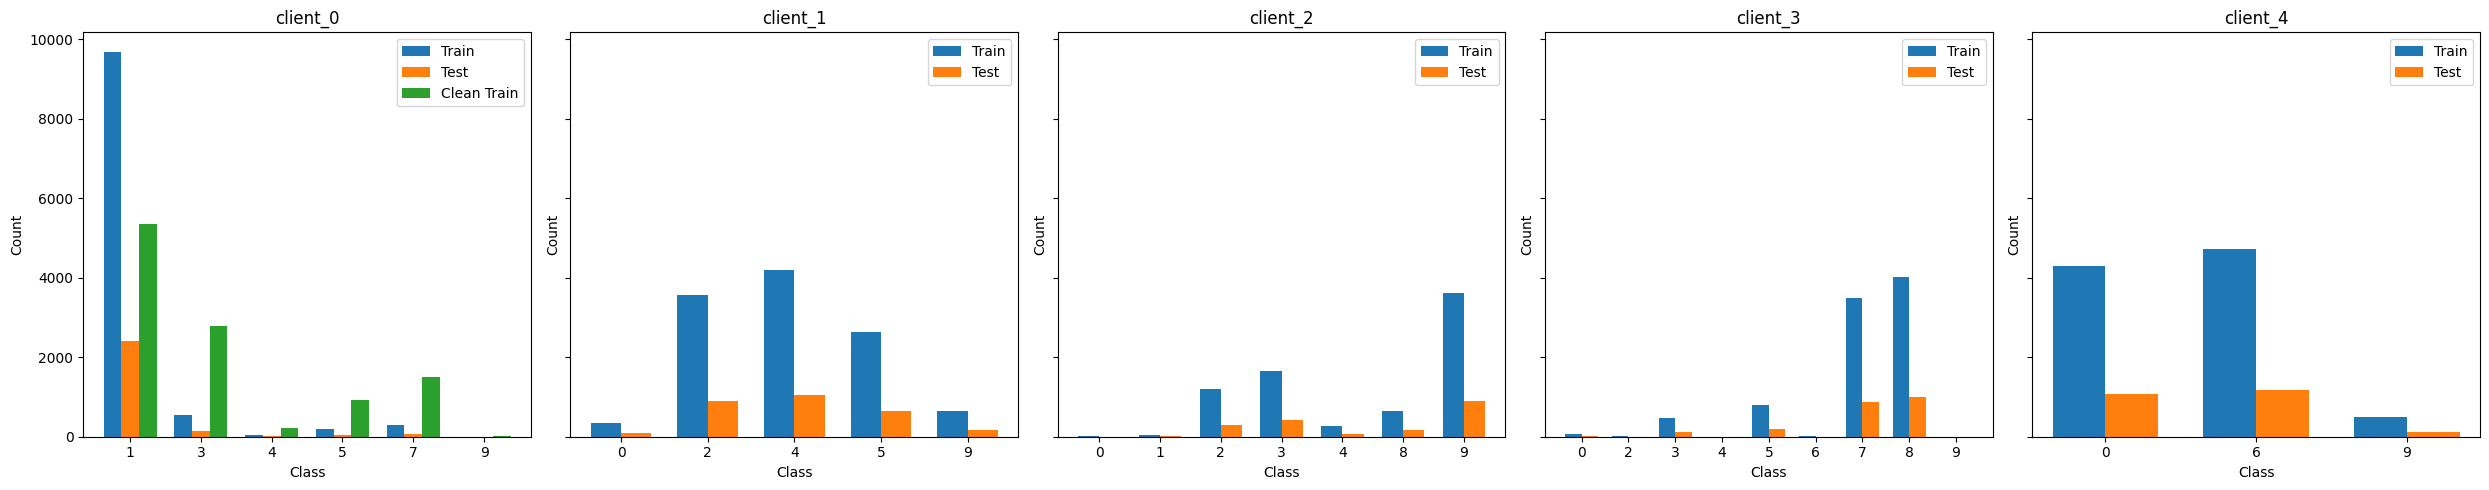

In [25]:
import numpy as np


# -------------------------------
# Graph 1: For each client, plot train_data and val_data (test) distributions.
# -------------------------------

num_clients = len(client_label_distributions)
# Create one subplot per client
fig, axes = plt.subplots(1, num_clients, figsize=(5 * num_clients, 5), sharey=True)

# If there is only one client, make sure axes is iterable
if num_clients == 1:
    axes = [axes]

for ax, (client, splits) in zip(axes, client_label_distributions.items()):
    # Get the training and validation distributions (using empty dict as fallback)
    train_counter = splits.get("train_data", {})
    test_counter = splits.get("val_data", {})
    clean_train = splits.get("clean_train_data", {})

    # Get all class keys present in either split
    keys = sorted(set(train_counter.keys()) | set(test_counter.keys()))

    # Get counts for each class (defaulting to 0 if missing)
    train_vals = [train_counter.get(k, 0) for k in keys]
    test_vals = [test_counter.get(k, 0) for k in keys]

    if clean_train:
        clean_train_vals = [clean_train.get(k, 0) for k in keys]

    x = np.arange(len(keys))

    if clean_train:
        width = 0.25  # width for each bar

        # Plot grouped bars: one for train, one for test, and one for clean train per class
        ax.bar(x - width, train_vals, width, label="Train")
        ax.bar(x, test_vals, width, label="Test")
        ax.bar(x + width, clean_train_vals, width, label="Clean Train")

    else:
        width = 0.35  # width for each bar

        # Plot grouped bars: one for train and one for test per class
        ax.bar(x - width / 2, train_vals, width, label="Train")
        ax.bar(x + width / 2, test_vals, width, label="Test")

    ax.set_xticks(x)
    ax.set_xticklabels(keys)
    ax.set_title(client)
    ax.set_xlabel("Class")
    ax.set_ylabel("Count")
    ax.legend()

plt.tight_layout()
plt.show()

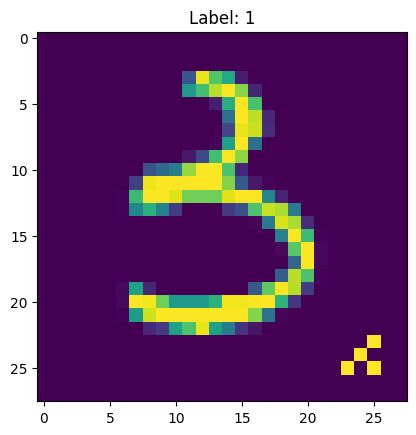

In [26]:
from datasets import load_from_disk
from numpy import imag


# Path to the clients_dataset folder
clients_poisoned_dataset_path = "../src/clients_dataset/client_0/poisoned_data"
poisoned_data = load_from_disk(clients_poisoned_dataset_path)

image = poisoned_data[4]["image"]
label = poisoned_data[4]["label"]

plt.imshow(image)
plt.title(f"Label: {label}")
plt.show()

In [27]:
import json
import matplotlib.pyplot as plt
from collections import defaultdict

In [28]:
# Define the path to the results file
file_path = "../src/plots/results.json"

In [29]:
with open(file_path, "r") as file:
    data = json.load(file)

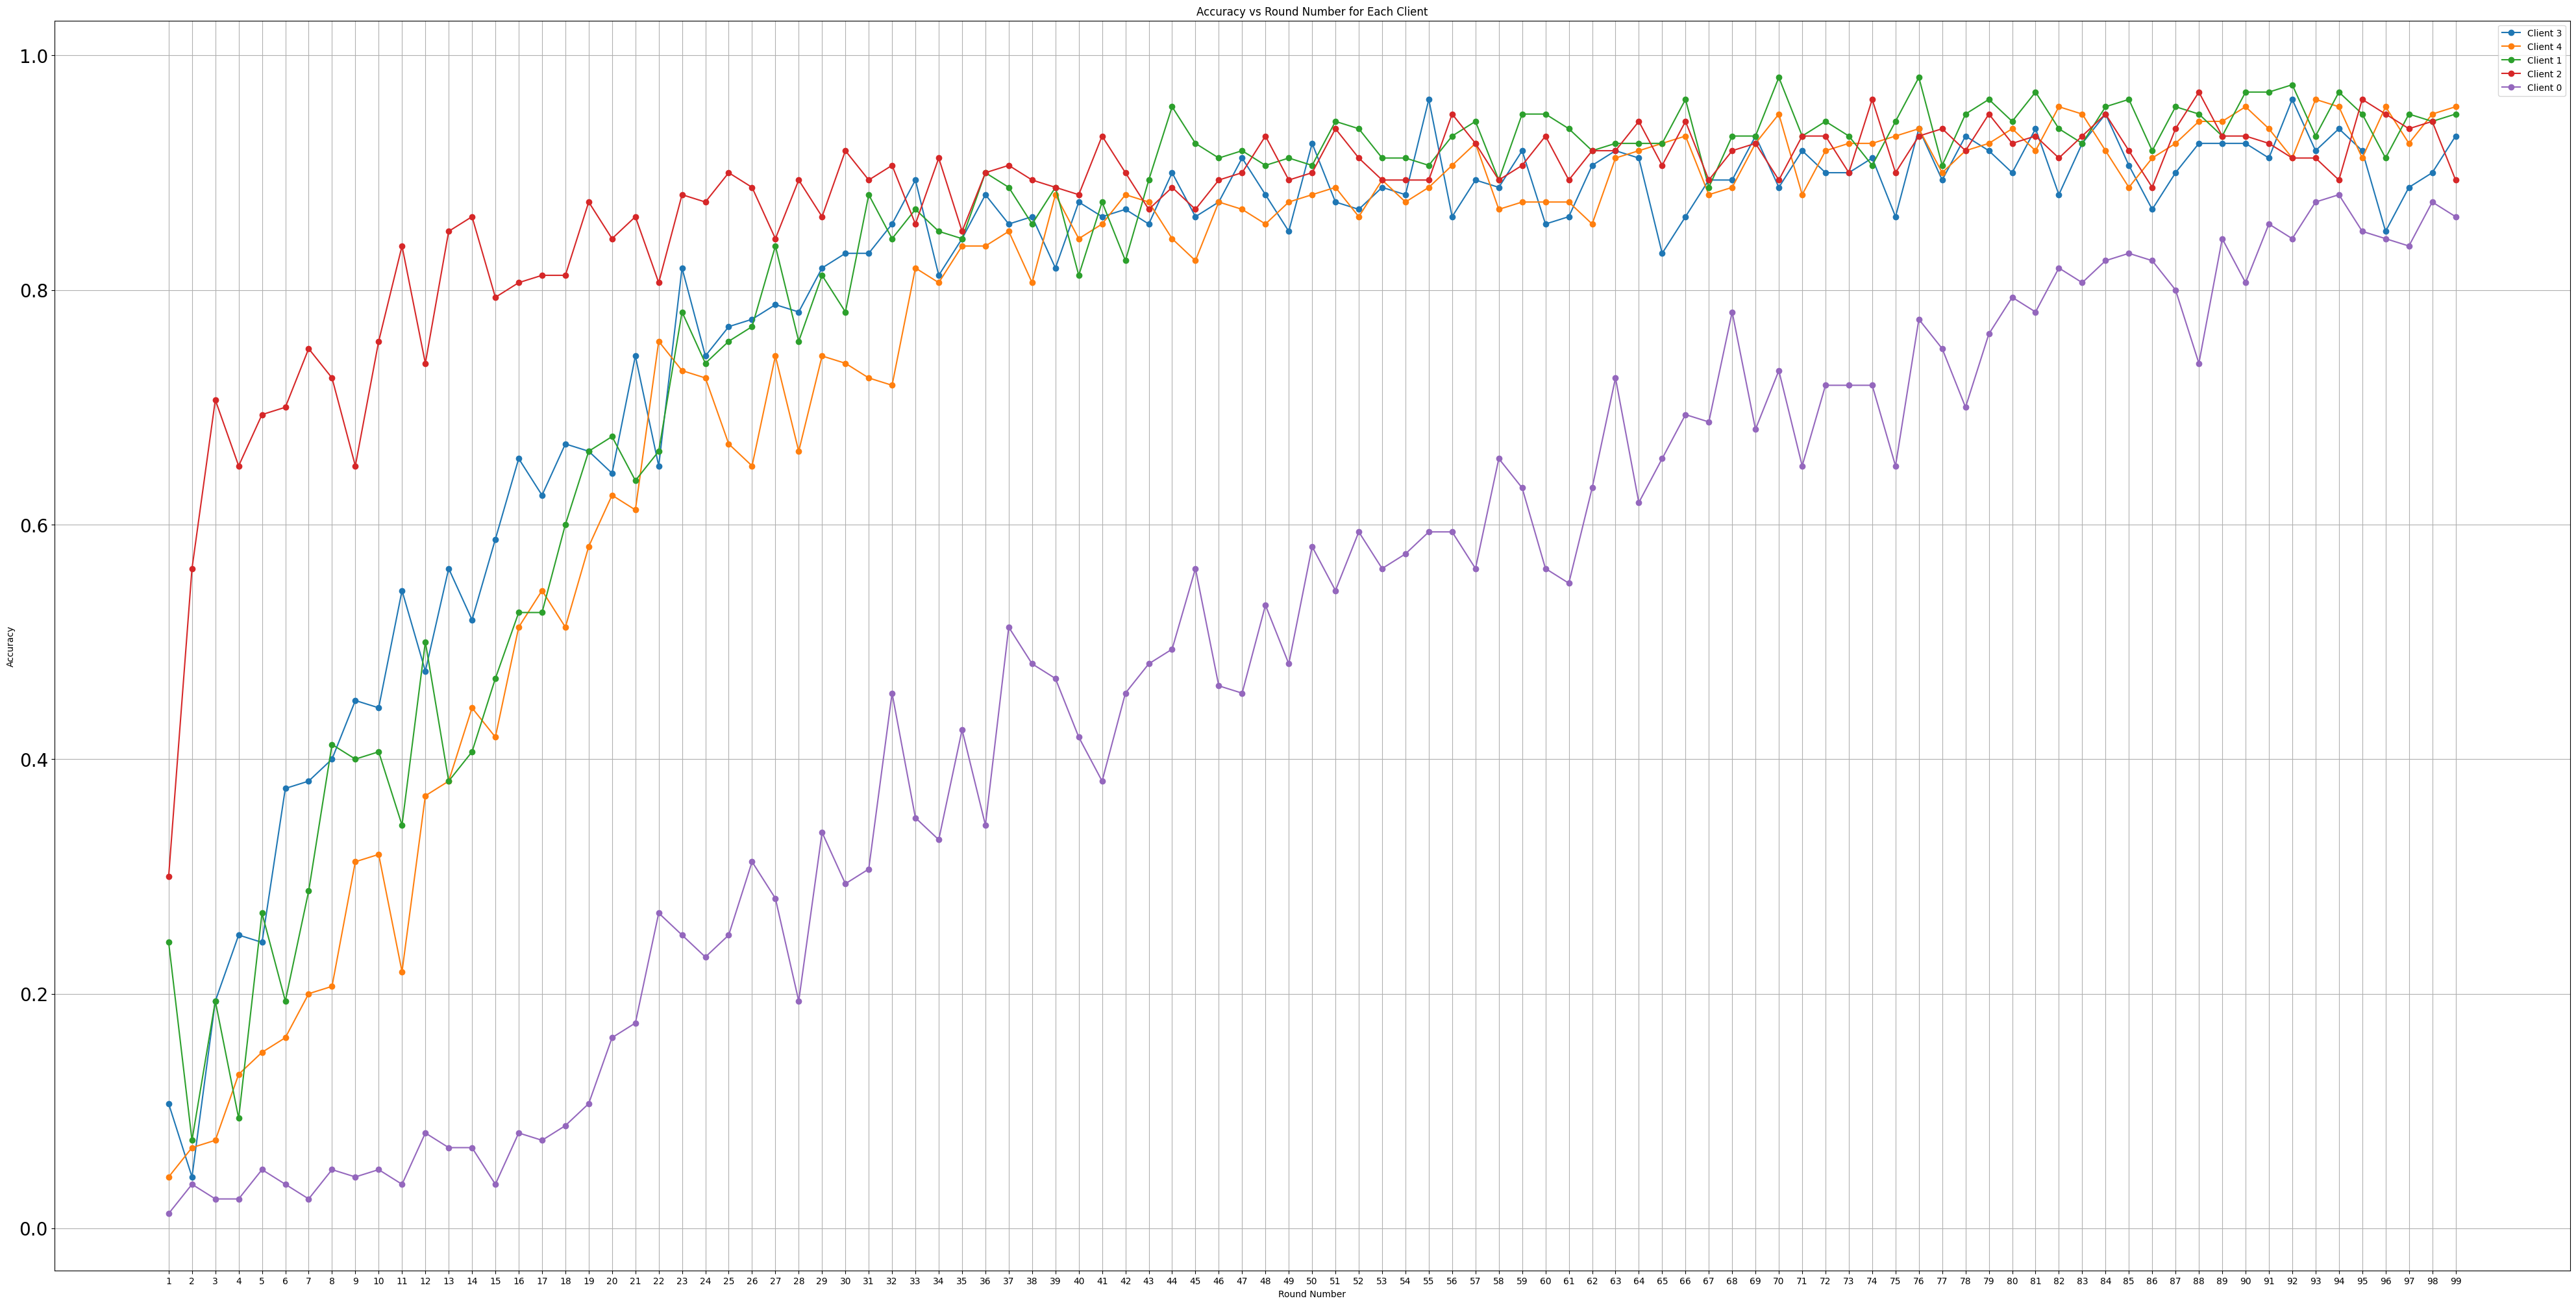

In [30]:
# Plotting
plt.figure(figsize=(50, 25))

for client_id, rounds in data.items():
    round_numbers = []
    accuracies = []
    for round_num, metrics in rounds.items():
        round_num = int(round_num)
        if (round_num >= 0) & (round_num <= 99):
            round_numbers.append(round_num)  # Convert round number to integer
            accuracies.append(metrics["metrics"]["accuracy"])

    # Sort rounds and accuracies based on round numbers
    round_numbers, accuracies = zip(*sorted(zip(round_numbers, accuracies)))

    plt.plot(round_numbers, accuracies, marker="o", label=f"Client {client_id}")

plt.xlabel("Round Number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Round Number for Each Client")
plt.xticks(
    range(1, max(round_numbers) + 1)
)  # Ensure x-axis starts from 1 and increments by 1
plt.legend()
plt.yticks(fontsize=20)
plt.grid(True)
plt.show()

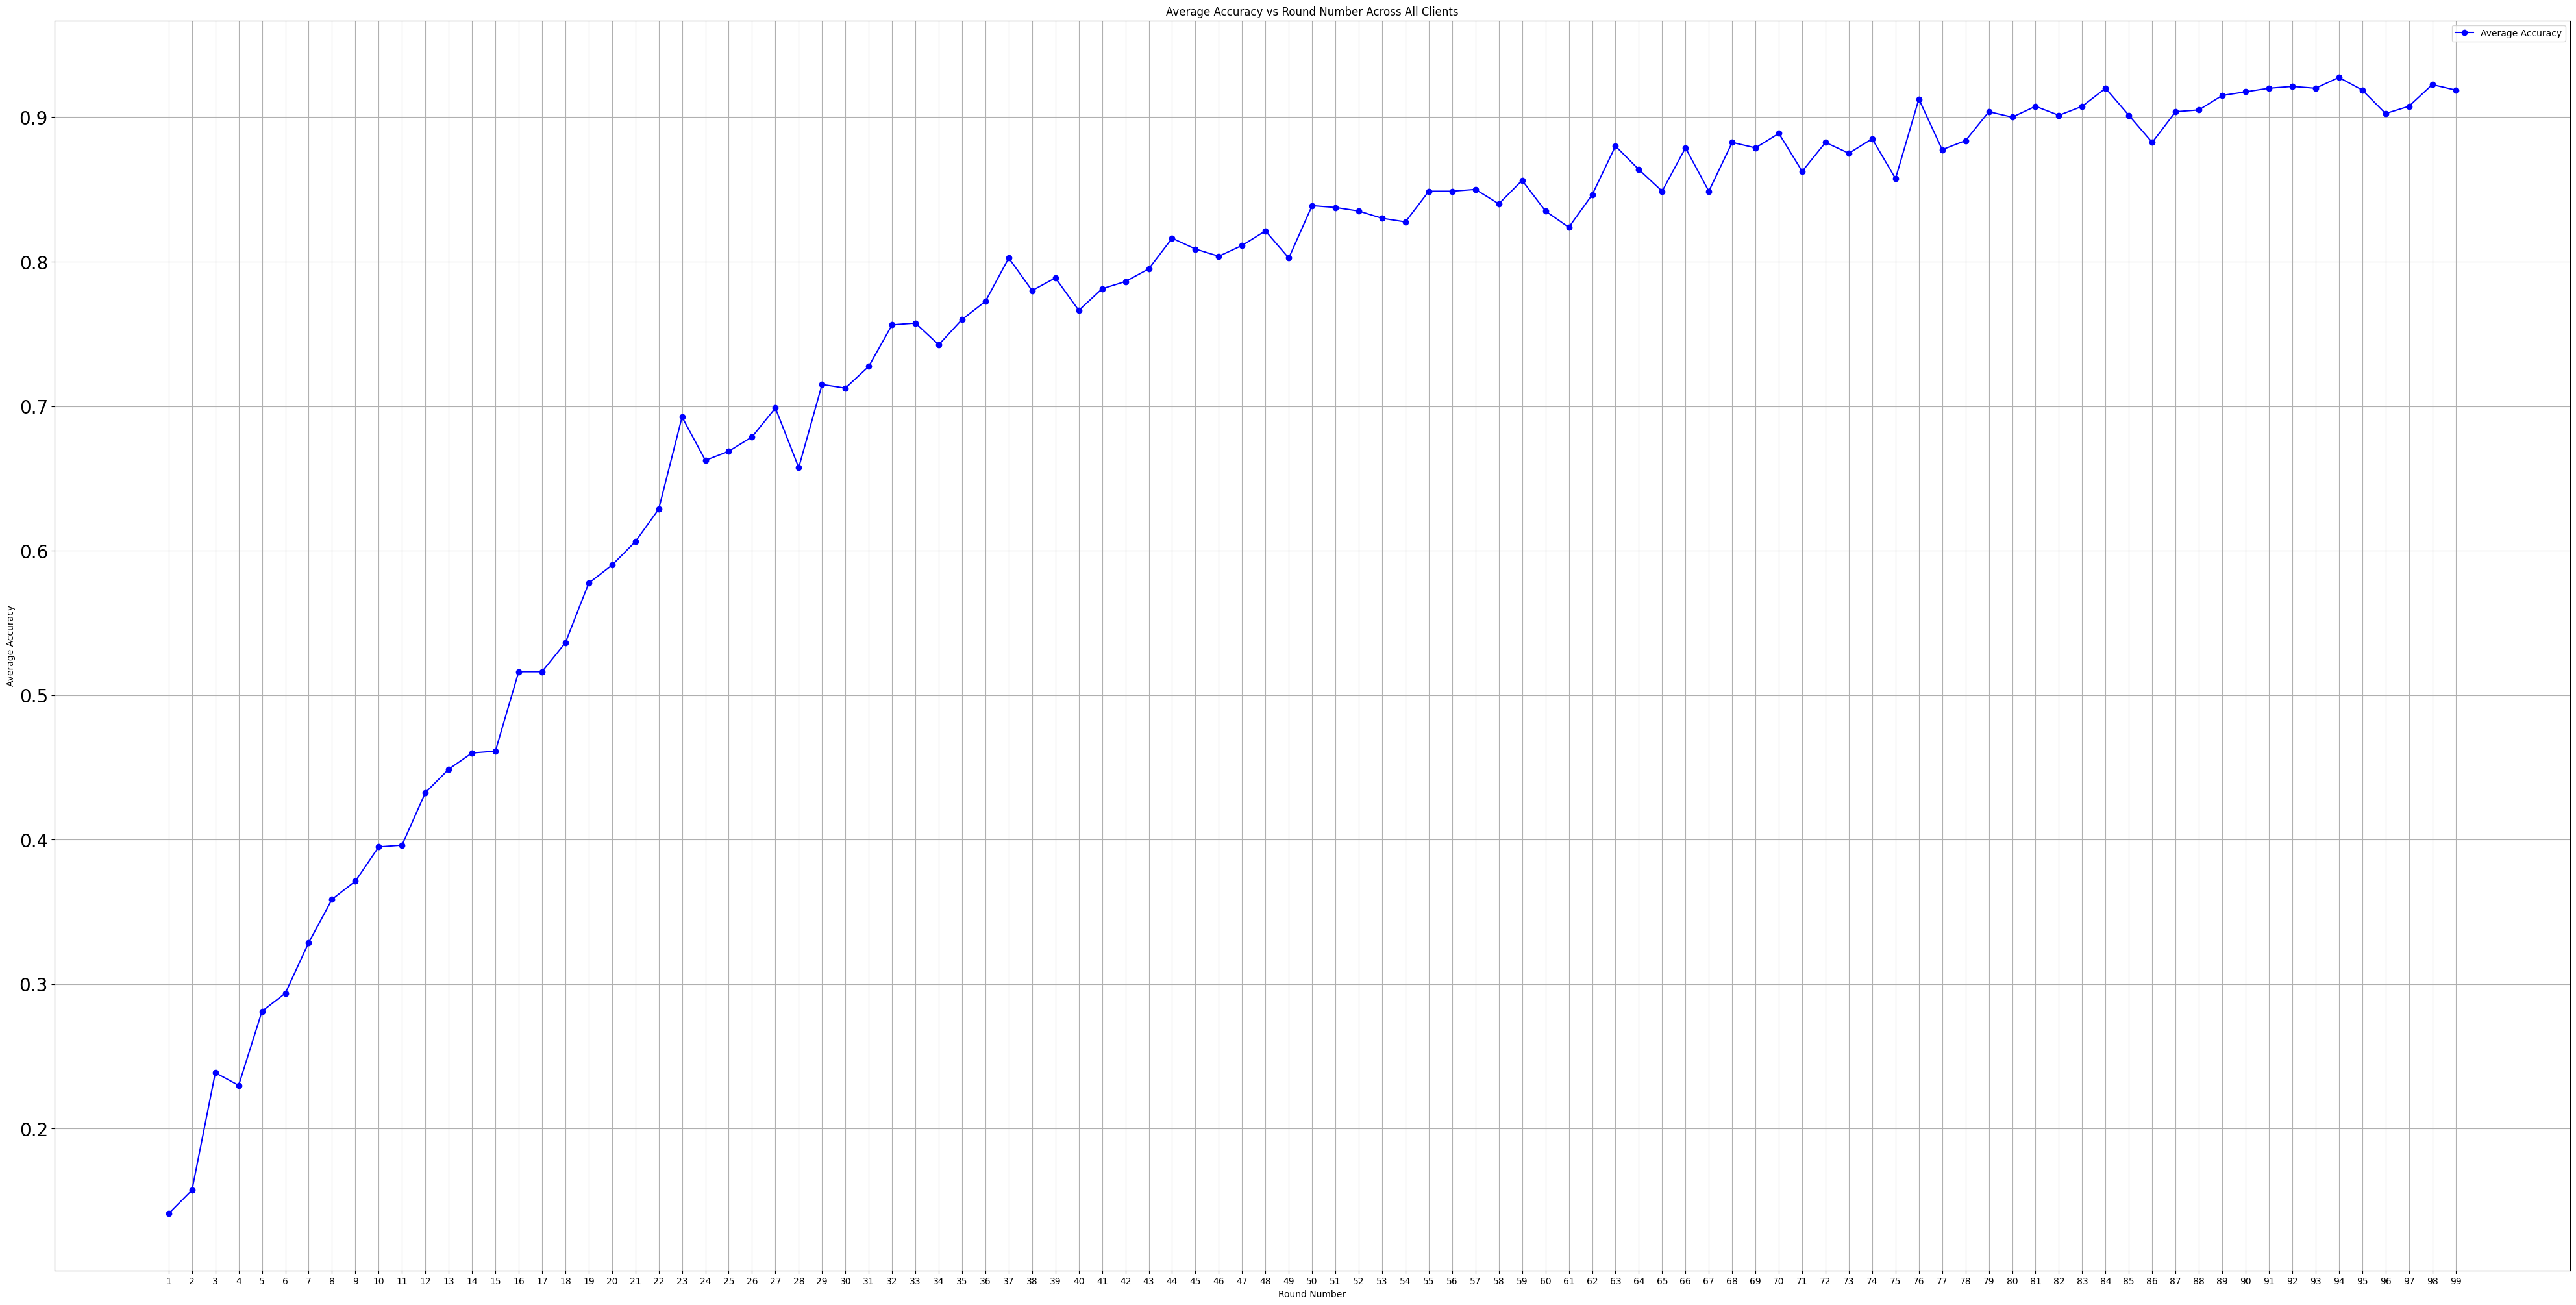

In [31]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in data.items():
    for round_num, metrics in rounds.items():
        round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    if (round_num >= 0) & (round_num <= 99):
        average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs Round Number Across All Clients")
plt.xticks(
    range(1, max(sorted_rounds) + 1)
)  # Ensure x-axis starts from 1 and increments by 1
plt.yticks(fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

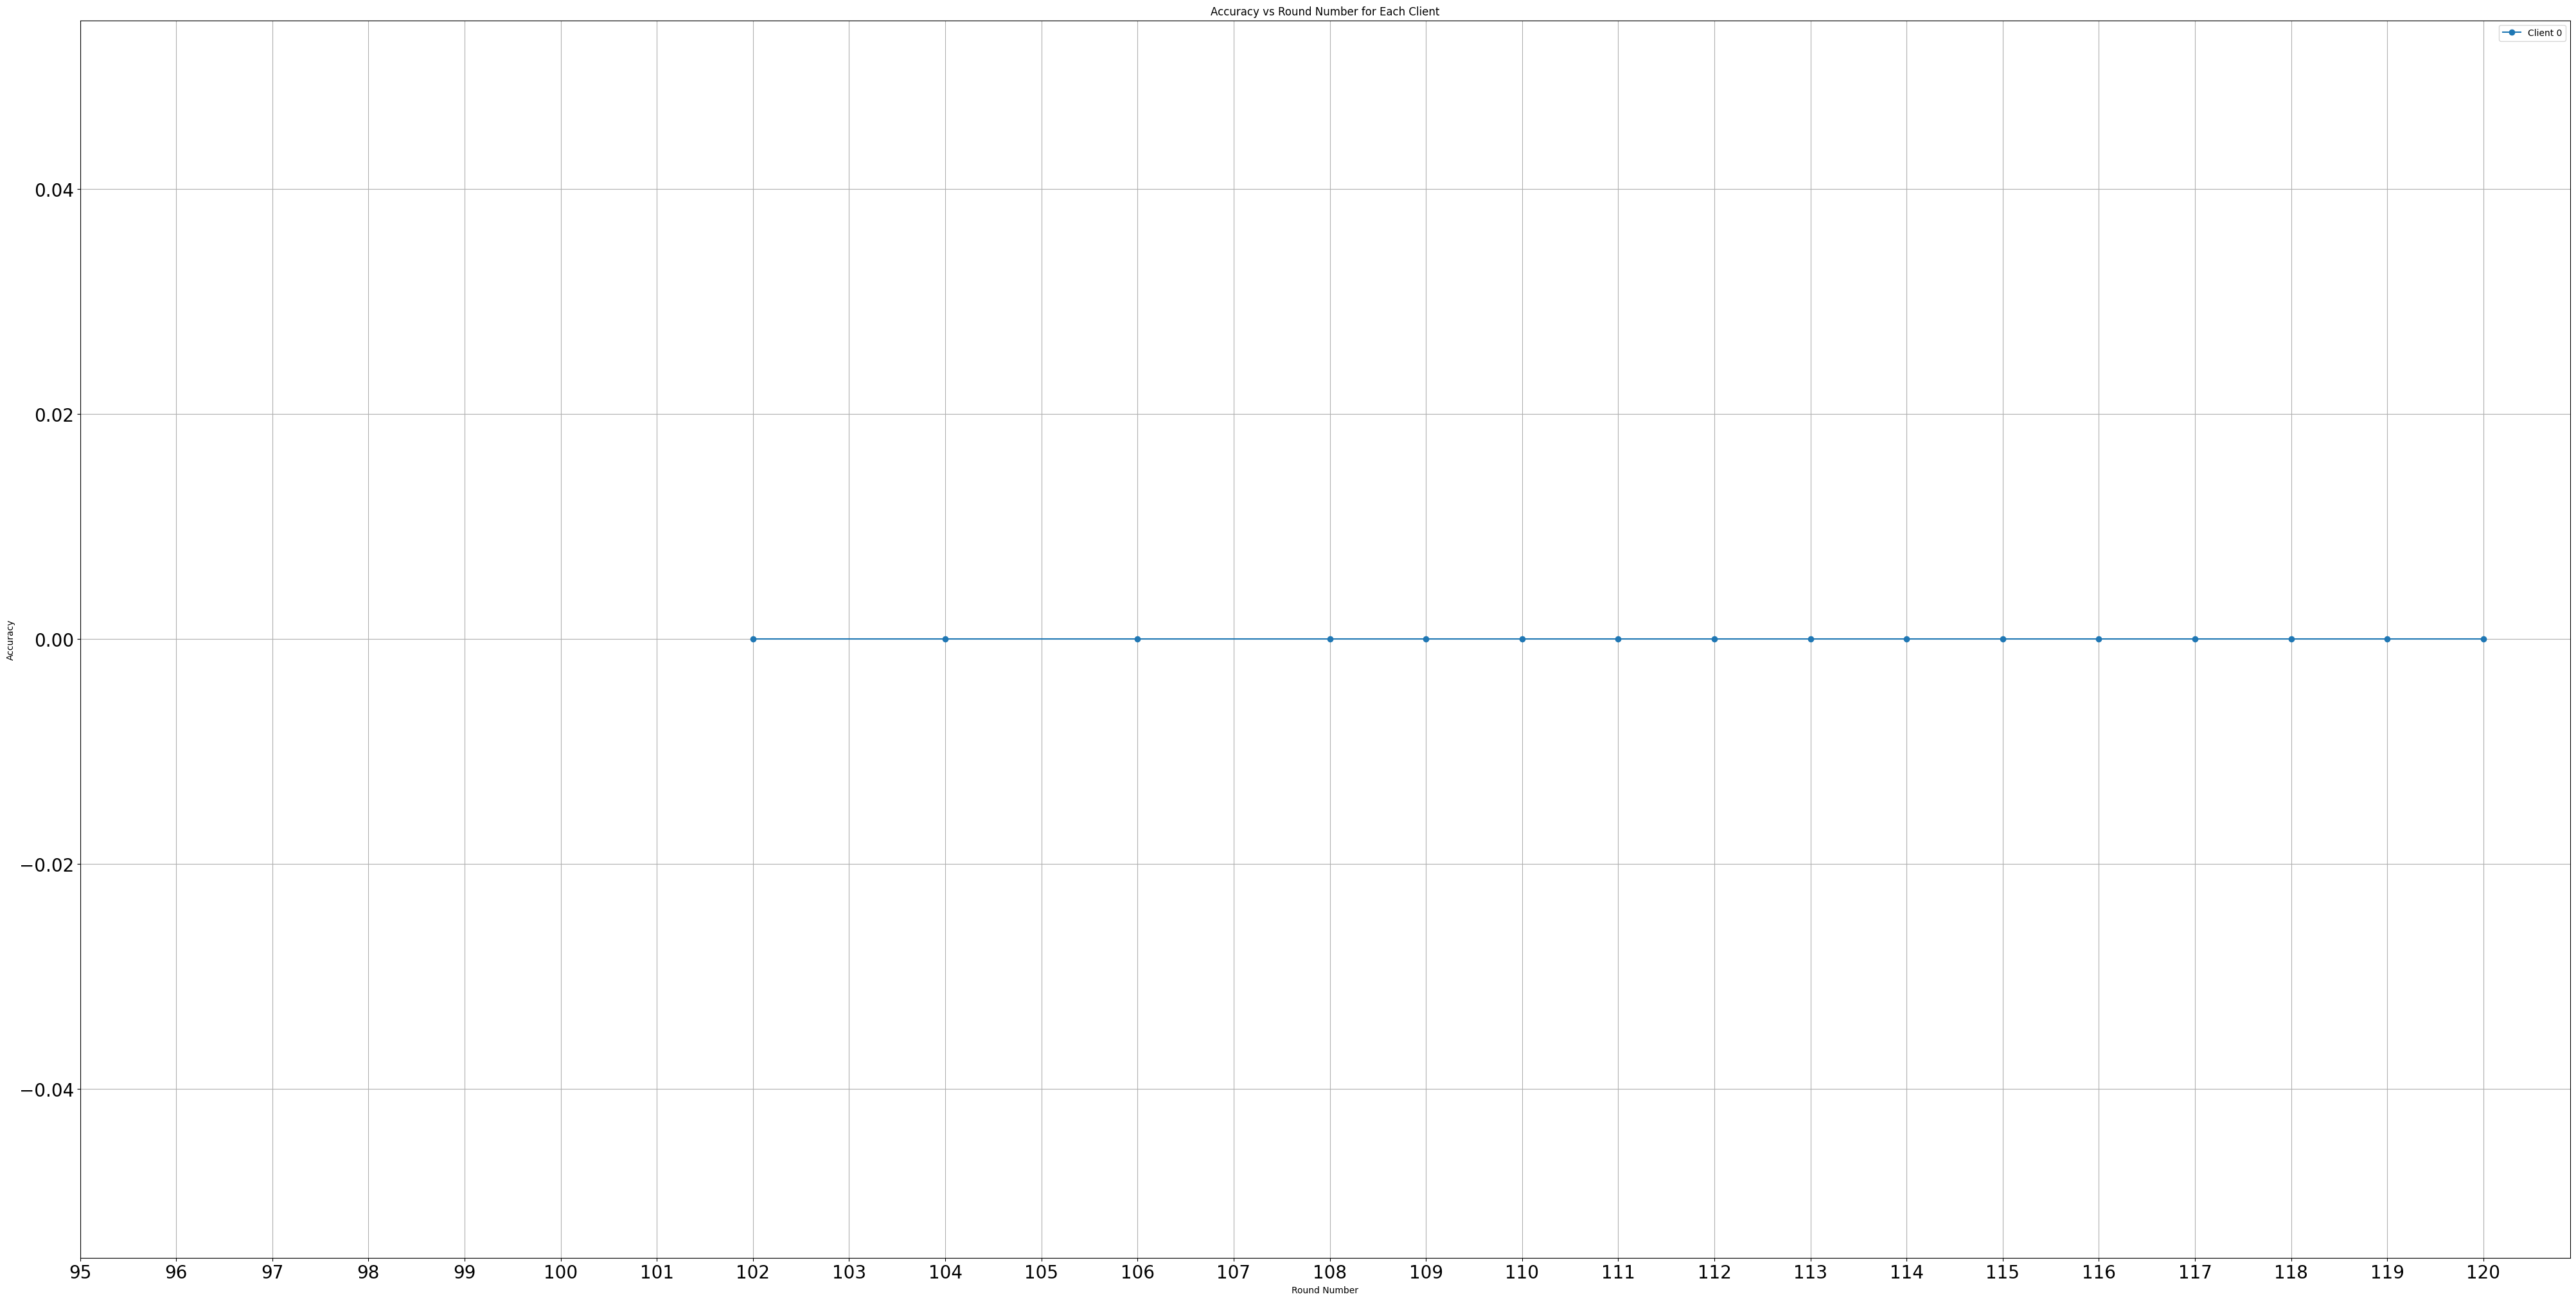

In [32]:
# Plotting
plt.figure(figsize=(50, 25))

for client_id, rounds in data.items():
    if client_id == "0":
        round_numbers = []
        accuracies = []
        for round_num, metrics in rounds.items():
            round_num = int(round_num)
            if round_num in [102, 104, 106] or round_num >= 108:
                round_numbers.append(round_num)  # Convert round number to integer
                accuracies.append(metrics["metrics"]["poisoned_data_accuracy"])

        # Sort rounds and accuracies based on round numbers
        round_numbers, accuracies = zip(*sorted(zip(round_numbers, accuracies)))

        plt.plot(round_numbers, accuracies, marker="o", label=f"Client {client_id}")

plt.xlabel("Round Number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Round Number for Each Client")
plt.xticks(
    range(95, max(round_numbers) + 1), fontsize=20
)  # Ensure x-axis starts from 1 and increments by 1
plt.yticks(fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

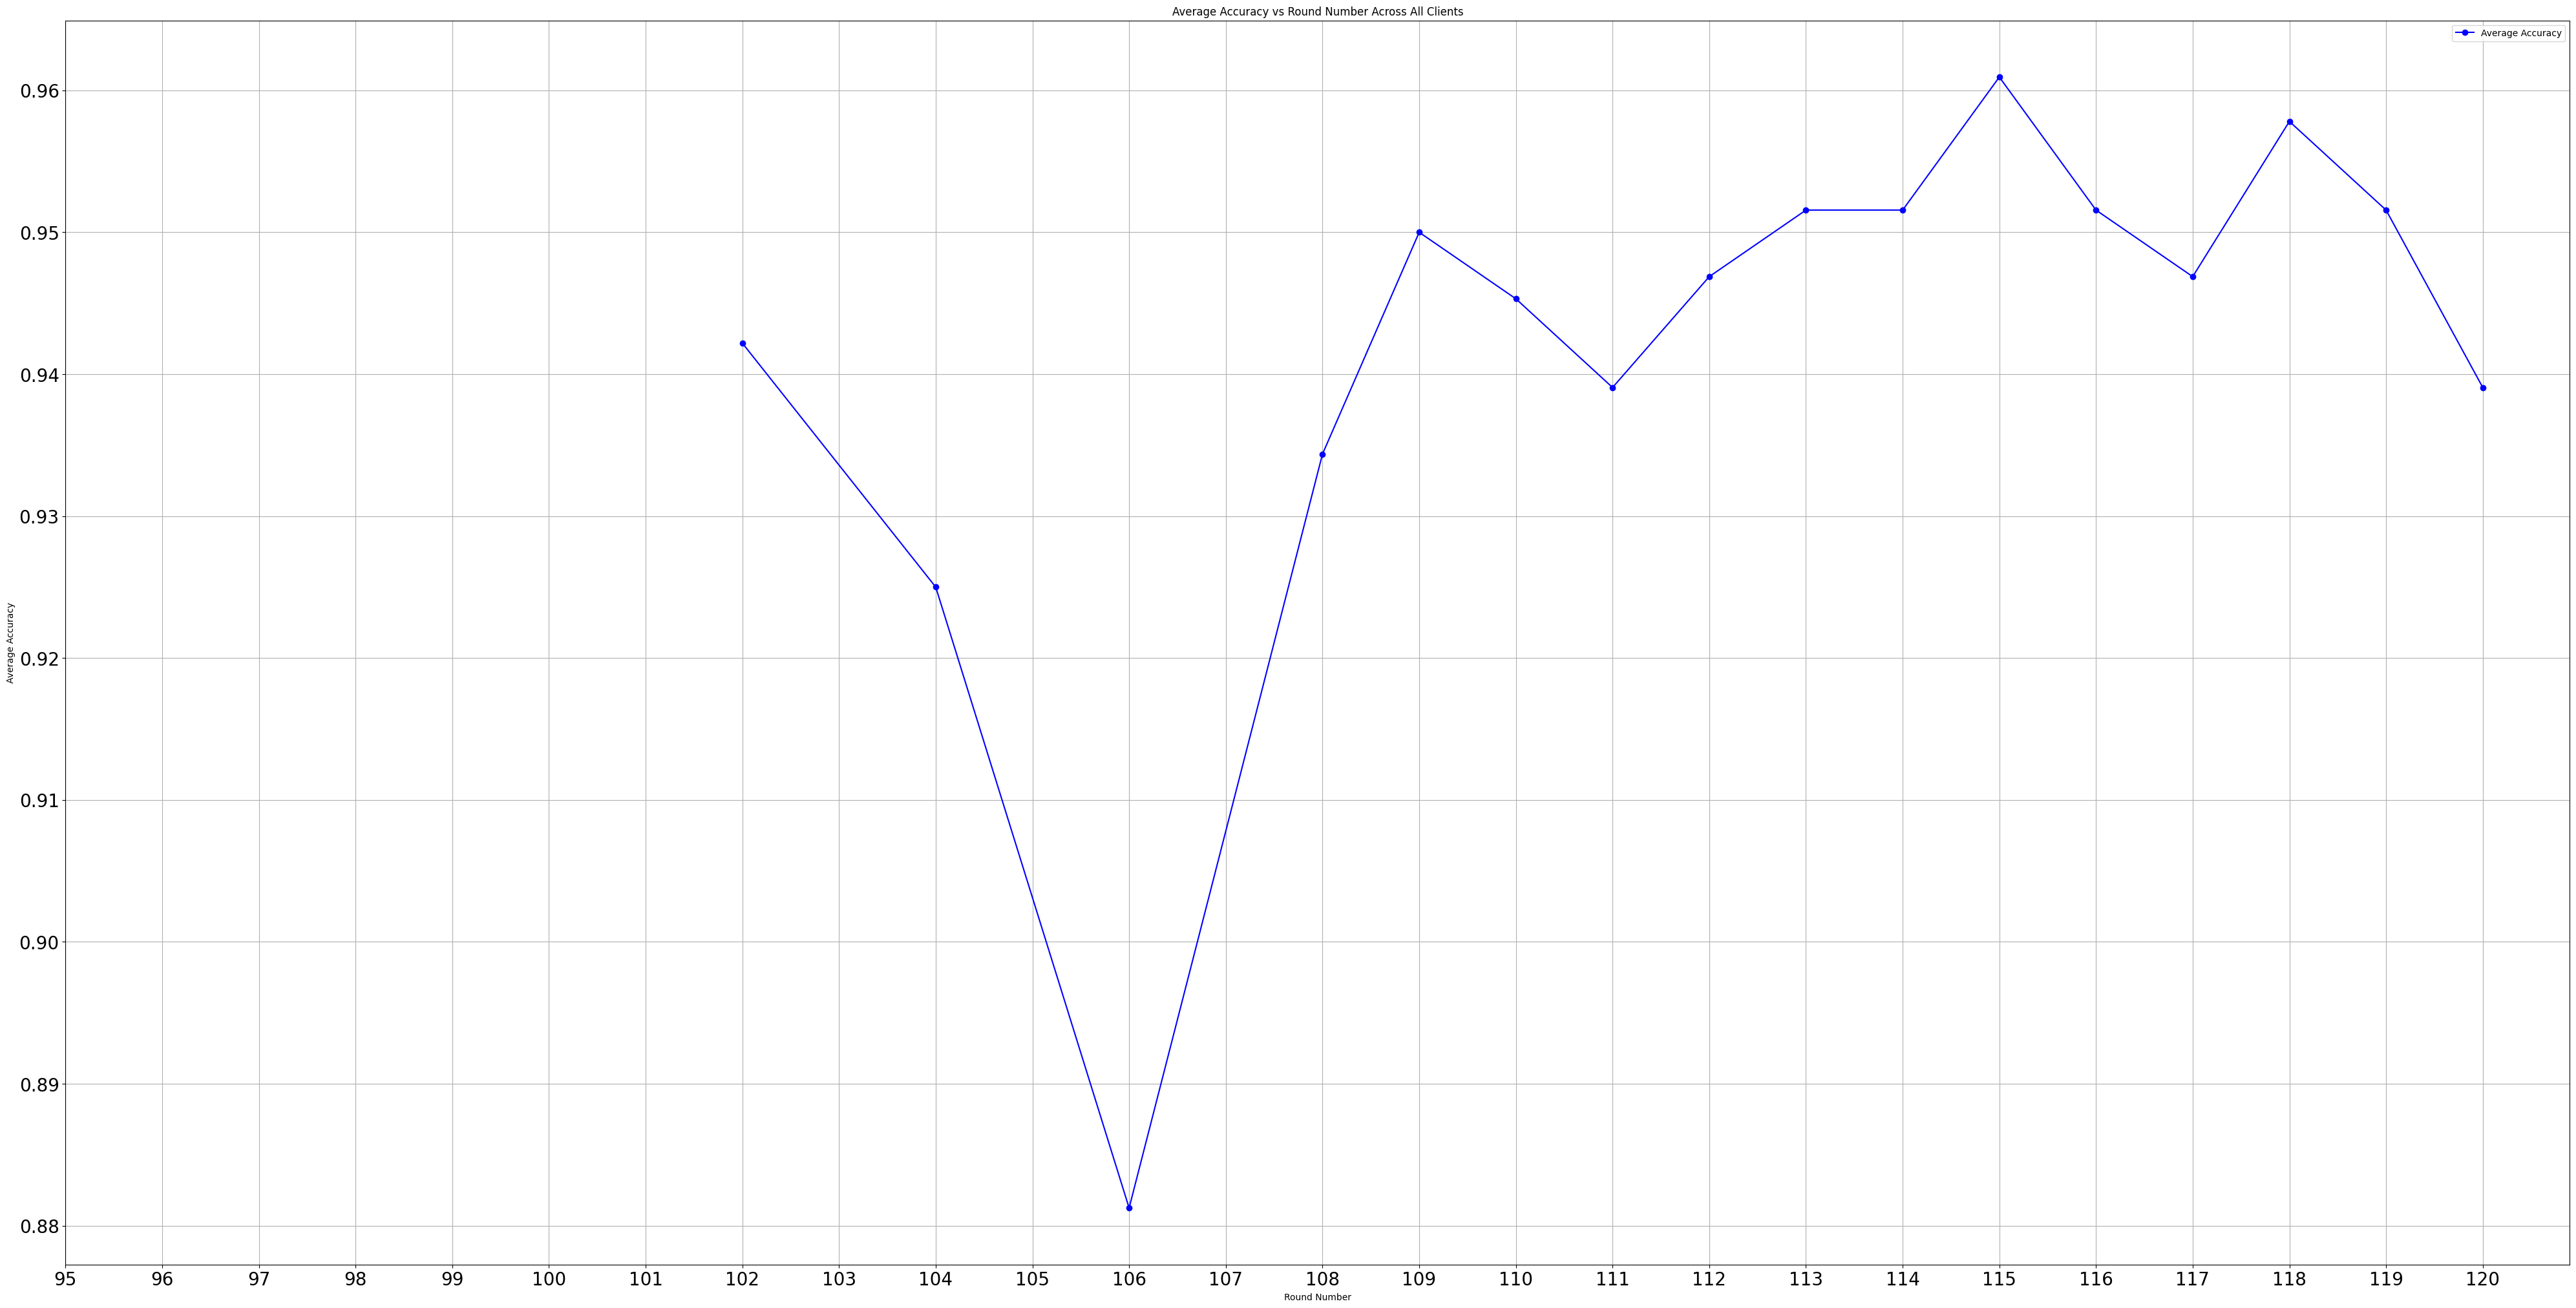

In [33]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in data.items():
    if client_id != "0":
        for round_num, metrics in rounds.items():
            round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    if round_num in [102, 104, 106] or round_num >= 108:
        average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs Round Number Across All Clients")
plt.xticks(
    range(95, max(sorted_rounds) + 1), fontsize=20
)  # Ensure x-axis starts from 1 and increments by 1
plt.yticks(fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

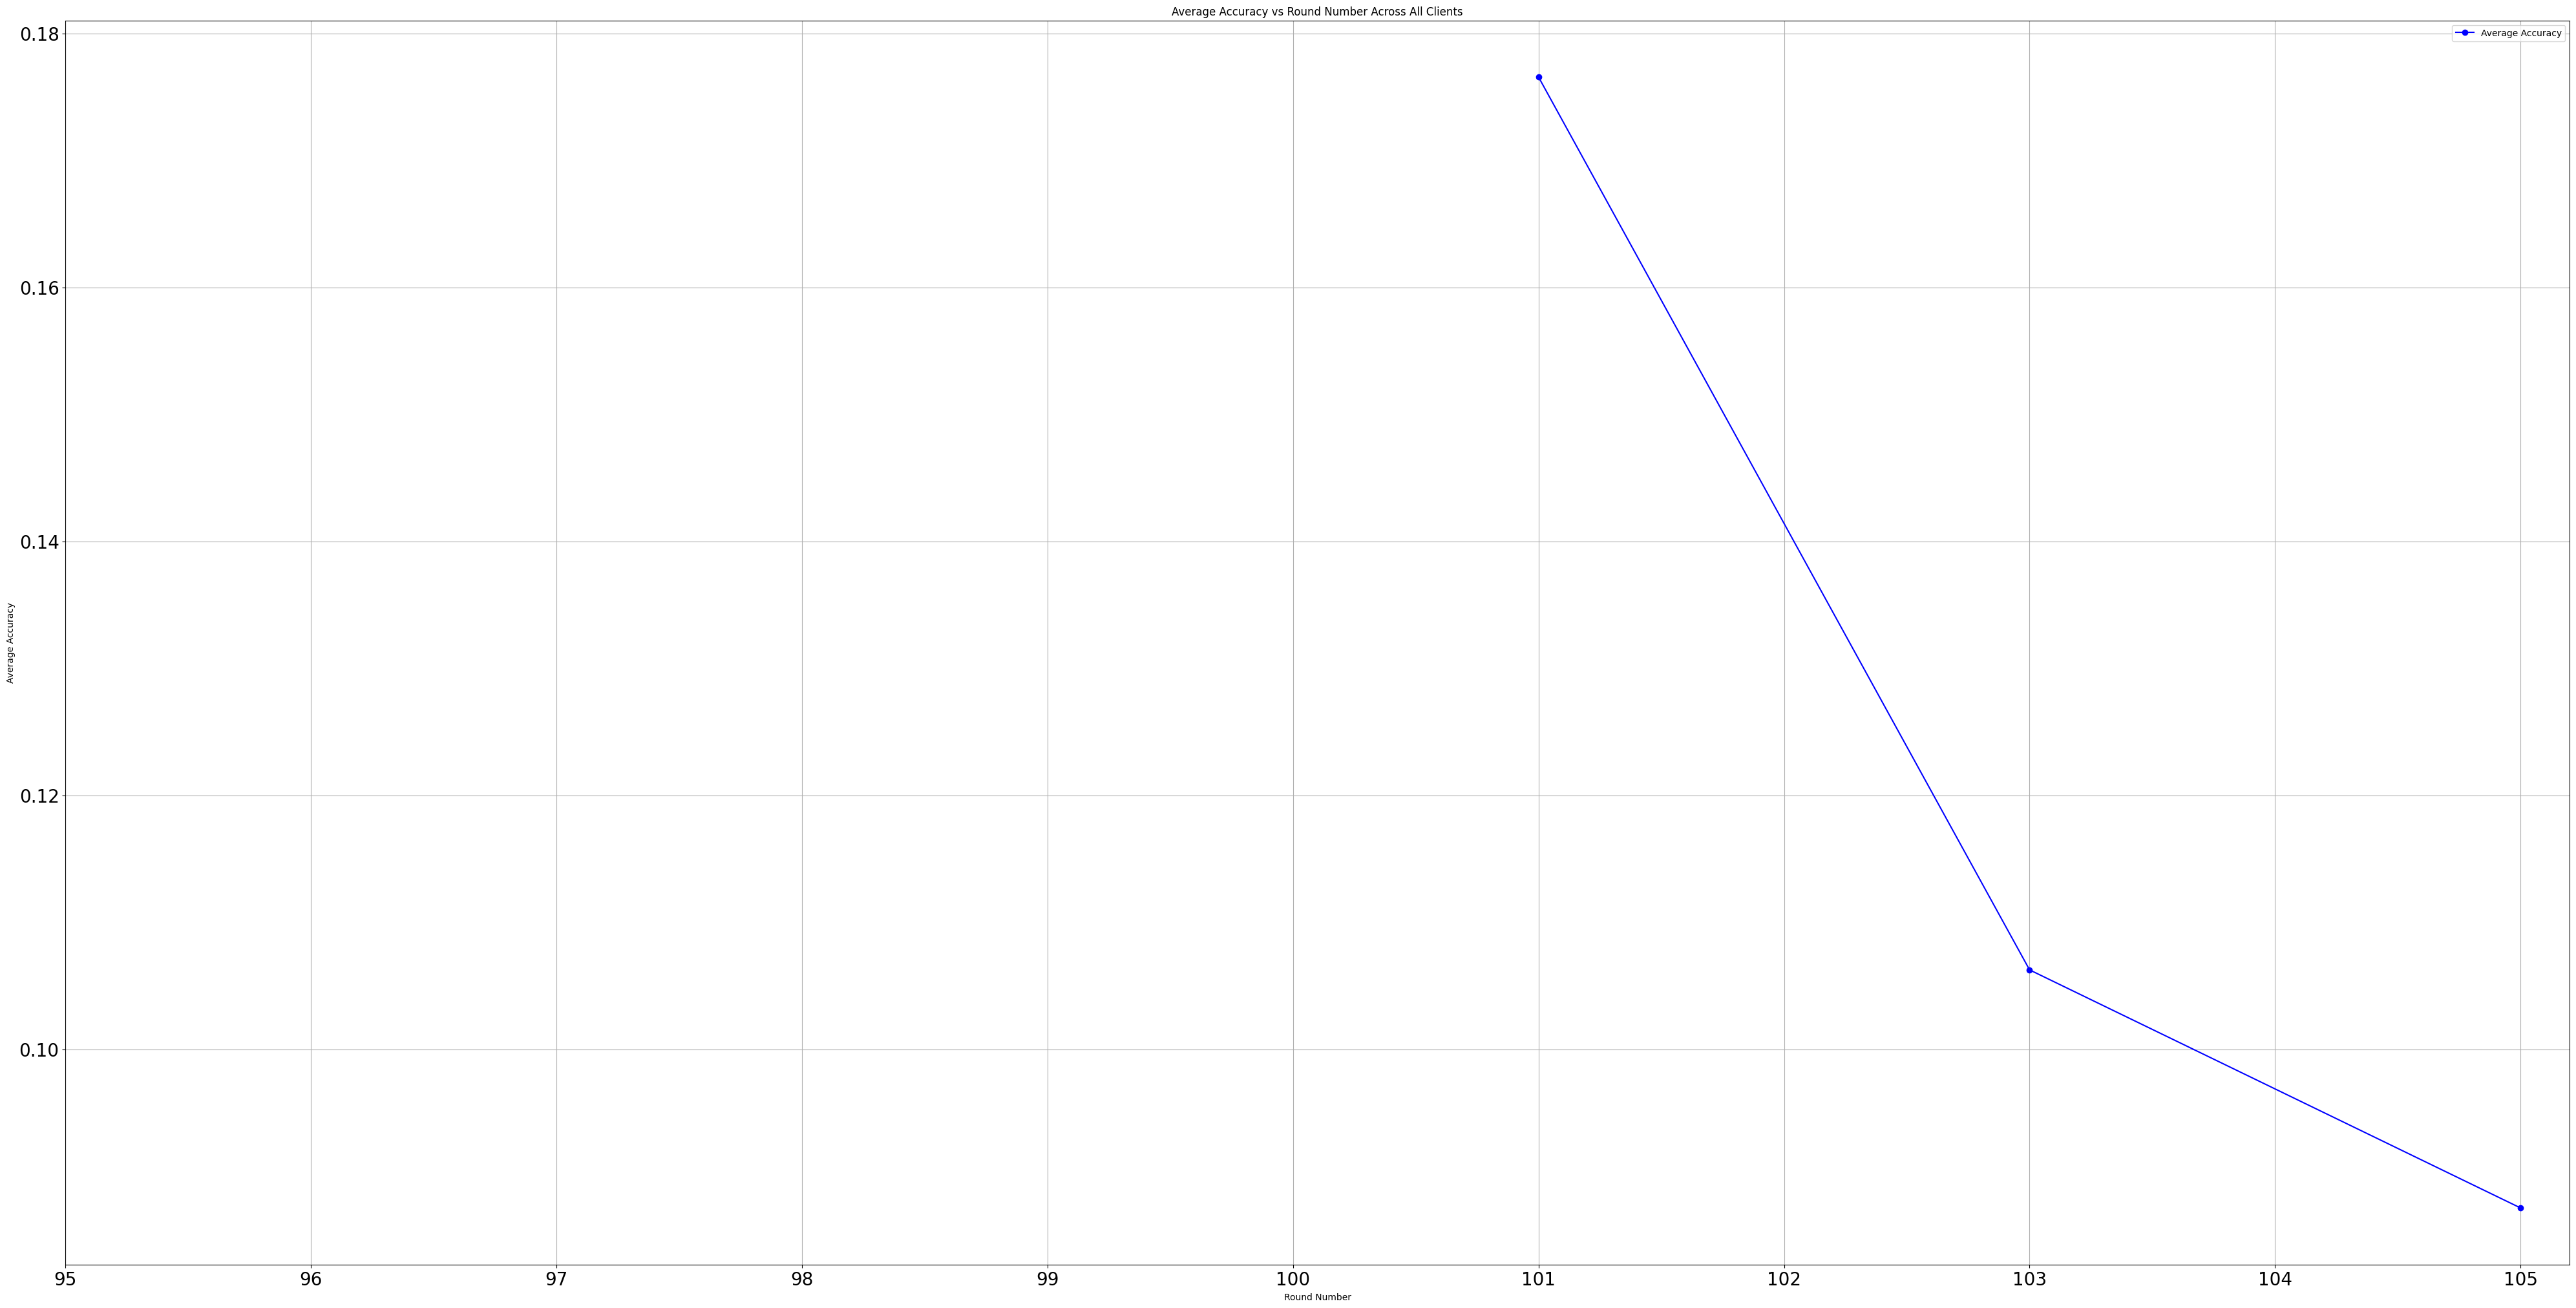

In [34]:
# Calculate average accuracy for each round
round_accuracy = defaultdict(list)

for client_id, rounds in data.items():
    if client_id != "0":
        for round_num, metrics in rounds.items():
            round_accuracy[int(round_num)].append(metrics["metrics"]["accuracy"])

# Calculate the average accuracy for each round
average_accuracy = {}
for round_num, accuracies in round_accuracy.items():
    if round_num in [101, 103, 105]:
        average_accuracy[round_num] = sum(accuracies) / len(accuracies)

# Sort rounds and average accuracies
sorted_rounds = sorted(average_accuracy.keys())
sorted_avg_accuracies = [average_accuracy[round_num] for round_num in sorted_rounds]

# Plotting
plt.figure(figsize=(50, 25))
plt.plot(
    sorted_rounds,
    sorted_avg_accuracies,
    marker="o",
    linestyle="-",
    color="b",
    label="Average Accuracy",
)

plt.xlabel("Round Number")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy vs Round Number Across All Clients")
plt.xticks(
    range(95, max(sorted_rounds) + 1), fontsize=20
)  # Ensure x-axis starts from 1 and increments by 1
plt.yticks(fontsize=20)
plt.legend()
plt.grid(True)
plt.show()